In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [15]:
df['label'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: label, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['label'] = lb.fit_transform(df['label'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [17]:
df['label'].value_counts()

1    50
2    50
0    49
Name: label, dtype: int64

In [20]:
x = df.drop('label',axis=1)
y = df['label']
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 14)
print("X_train shape:",x_train.shape)
print("X_test shape:",x_test.shape)
print("Y_train shape:",y_train.shape)
print("Y_test shape:",y_test.shape)

X_train shape: (111, 4)
X_test shape: (38, 4)
Y_train shape: (111,)
Y_test shape: (38,)


In [23]:
from sklearn.svm import SVC

In [24]:
df1 = df[df['label']!=2]
df1.shape

(99, 5)

In [26]:
x1,y1 = df1.iloc[:,2:4].values,df1['label']
x1[:5]

array([[1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4]])

In [27]:
print(type(x1))
print(type(y1))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [28]:
m = SVC(kernel='linear', C=0.1)
m.fit(x1, y1)

SVC(C=0.1, kernel='linear')

In [29]:
x1[:5]

array([[1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4]])

#### Creating Meshgrid

In [38]:
h = 0.2
x_min, x_max = x1[:, 0].min() - 1, x1[:, 0].max() + 1
y_min, y_max = x1[:, 1].min() - 1, x1[:, 1].max() + 1
print(x_min,x_max)
print(y_min,y_max)
r1 = np.arange(x_min, x_max, h)
print(r1.shape)
r2 = np.arange(y_min, y_max, h)
print(r2.shape)

0.0 6.1
-0.9 2.8
(31,)
(19,)


In [39]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
print(xx.shape)
print(yy.shape)

(19, 31)
(19, 31)


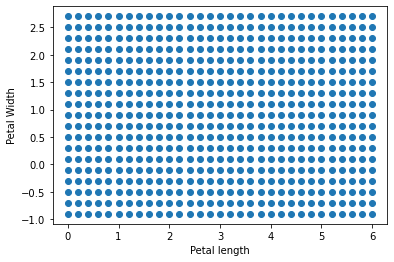

In [40]:
plt.scatter(xx,yy)
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.show()

In [42]:
19*31

589

In [43]:
print(xx.shape)
print(xx.ravel().shape)
print(yy.shape)
print(yy.ravel().shape)

(19, 31)
(589,)
(19, 31)
(589,)


In [45]:
# new_data = coordinate system of meshgrid generated stacked one on top of the other
new_data = np.vstack([xx.ravel(), yy.ravel()]).T
print(new_data.shape)
Z = m.predict(new_data)
print(len(Z),Z)

(589, 2)
589 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1

(19, 31)


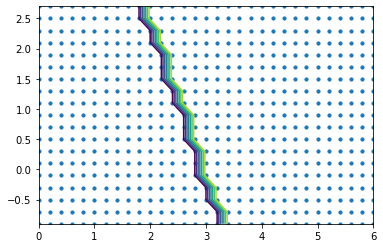

In [48]:
Z = Z.reshape(xx.shape)
print(Z.shape)
plt.scatter(xx,yy,s=10)
plt.contour(xx, yy, Z)  
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
# cmap=plt.cm.coolwarm,
plt.show()

In [24]:
print(new_data[0])
print(new_data[17])

[ 0.  -0.9]
[ 3.4 -0.9]


In [51]:
x1,y1 = df1.iloc[:,2:4],df1['label']  # petal length, petal_width
print(x1.shape)
print(y1.shape)
print(type(x1))
print(type(y1))

(99, 2)
(99,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [53]:
def svm_withC(C,title):
    m = SVC(kernel='linear', C=C)
    m.fit(x1, y1)
    ax = plt.gca()

    plt.scatter(x1.iloc[:,0], x1.iloc[:,1], c=y1, s=50, cmap='autumn')
    plt.scatter(m.support_vectors_[:,0],m.support_vectors_[:,1])
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T  # corrdinates of meshgrid
    Z = m.decision_function(xy).reshape(XX.shape)
#     Z = m.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    ax.scatter(m.support_vectors_[:, 0], m.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel("Petal Length",fontsize = 18)
    plt.ylabel("Petal Width",fontsize = 18)
    plt.title(title + " Score:" + str(m.score(x1,y1)),fontsize = 18)

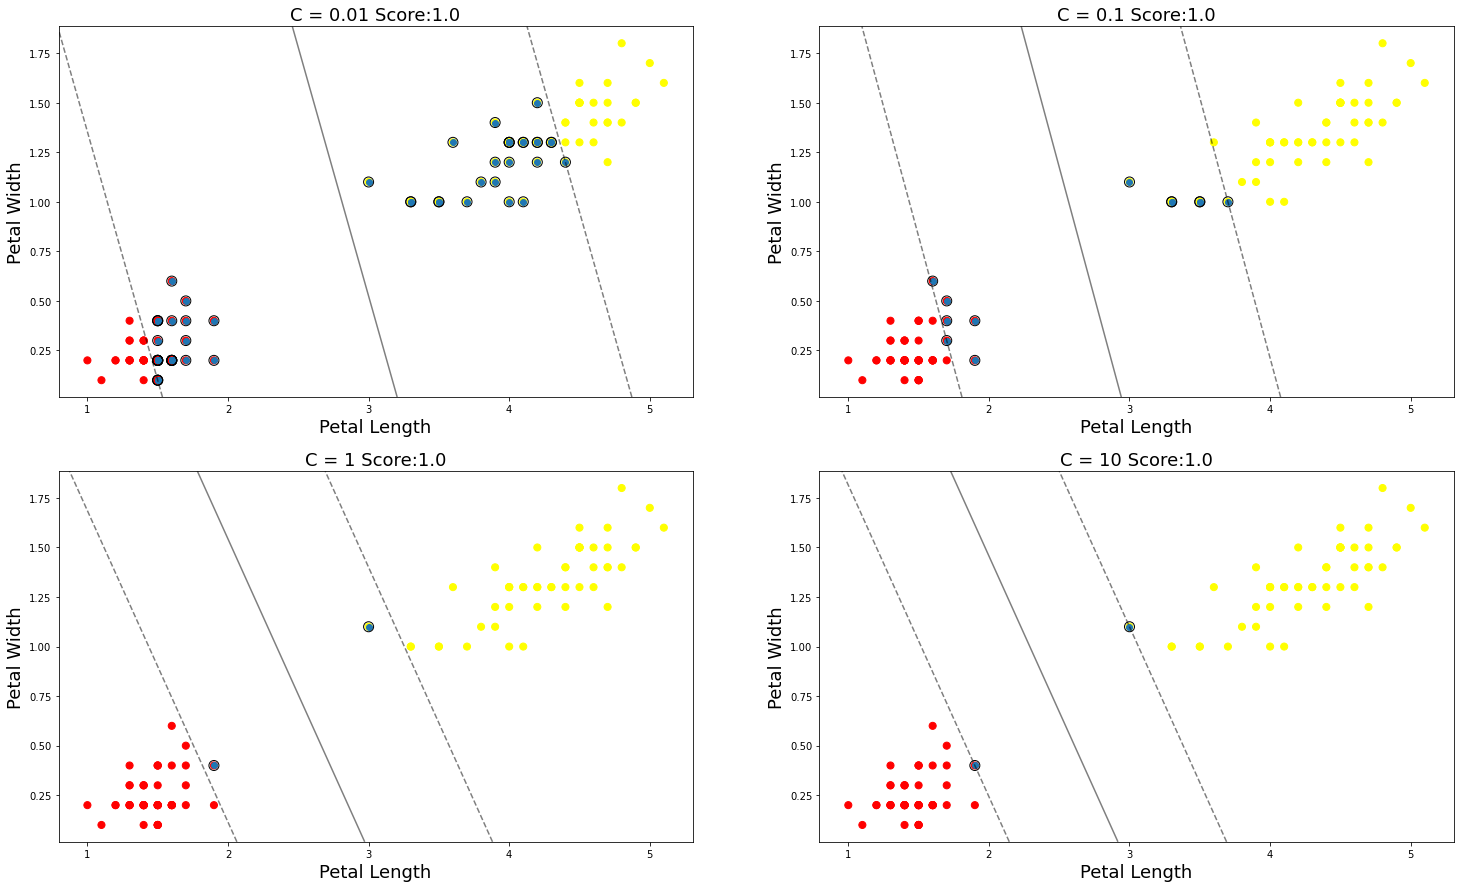

In [54]:
plt.figure(figsize=(25,15))
for i,c in enumerate([0.01,0.1,1,10]):  
    plt.subplot(2,2,i+1)
    svm_withC(C = c, title = "C = " + str(c))
plt.show()

#### Decision Function
Decision function is a method present in classifier{ SVC, Logistic Regression } class of sklearn machine learning framework. This method basically returns a Numpy array, In which each element represents whether a predicted sample for x_test by the classifier lies to the right or left side of the Hyperplane and also how far from the HyperPlane. It also tells us that how confidently each value predicted for x_test by the classifier is Positive ( large-magnitude Positive value ) or Negative ( large-magnitude Negative value).

In [56]:
def meshgrid(x, y, h=.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [61]:
def contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [62]:
X = df1.iloc[:, :2] # we only take the first two features.
Y = df1['label']

### Kernel

In [63]:
def visualize_kernels(X,Y,ax, title, C  = 1.0 ,kernel='linear',degree = 3,gamma='scale'):
    model = SVC(C = C, kernel=kernel,gamma = gamma,degree = degree)
    clf = model.fit(X, Y)
    
    X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
    xx, yy = meshgrid(X0, X1)
    contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_ylabel("Sepal Length",fontsize = 18)
    ax.set_xlabel("Sepal Width", fontsize = 18)
    ax.set_title(title + "    Score:" + str(model.score(X,Y)),fontsize = 18)

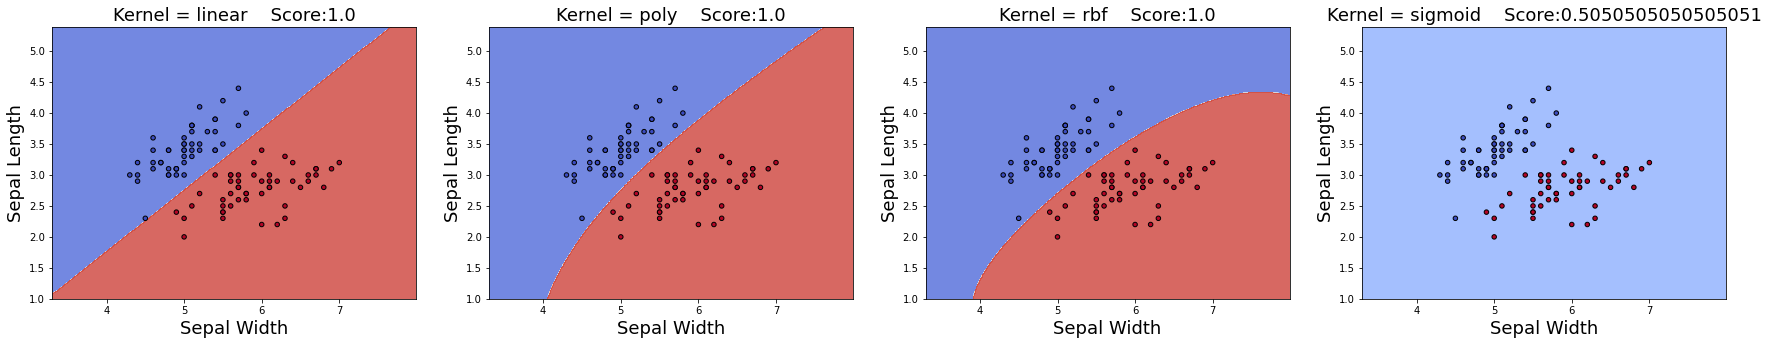

In [64]:
fig, ax = plt.subplots(1,4,figsize=(30,5))
for i,k in enumerate(['linear','poly','rbf','sigmoid']):
    visualize_kernels(X,Y,ax[i],title = ("Kernel = " + k),kernel = k)
plt.show()

### Degree

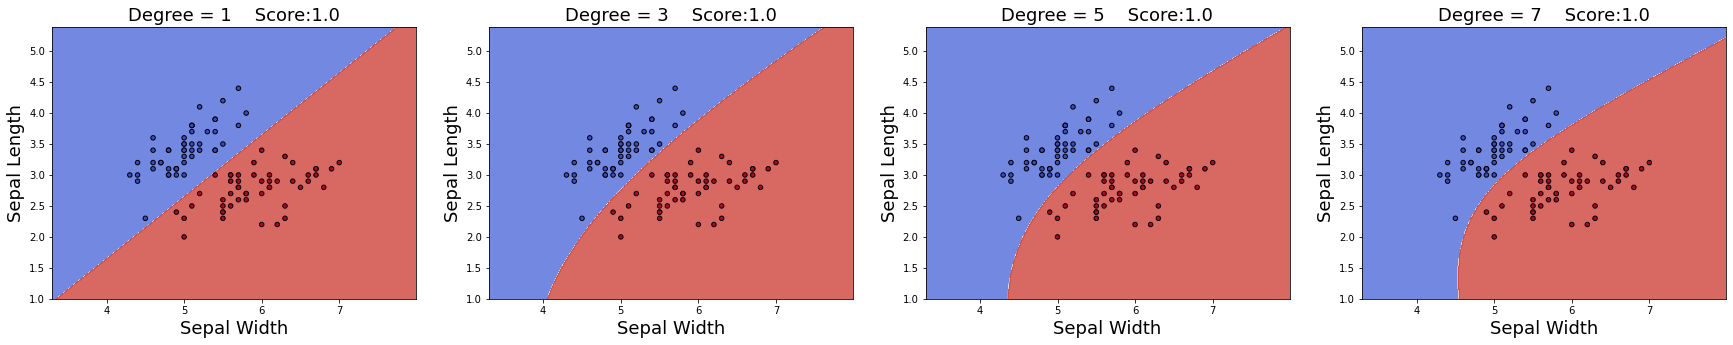

In [65]:
fig, ax = plt.subplots(1,4,figsize=(30,5))
for i,d in enumerate([1,3,5,7]):
    visualize_kernels(X,Y,ax[i],title = ("Degree = " + str(d)),kernel = 'poly',degree = d)
plt.show()

### Gamma

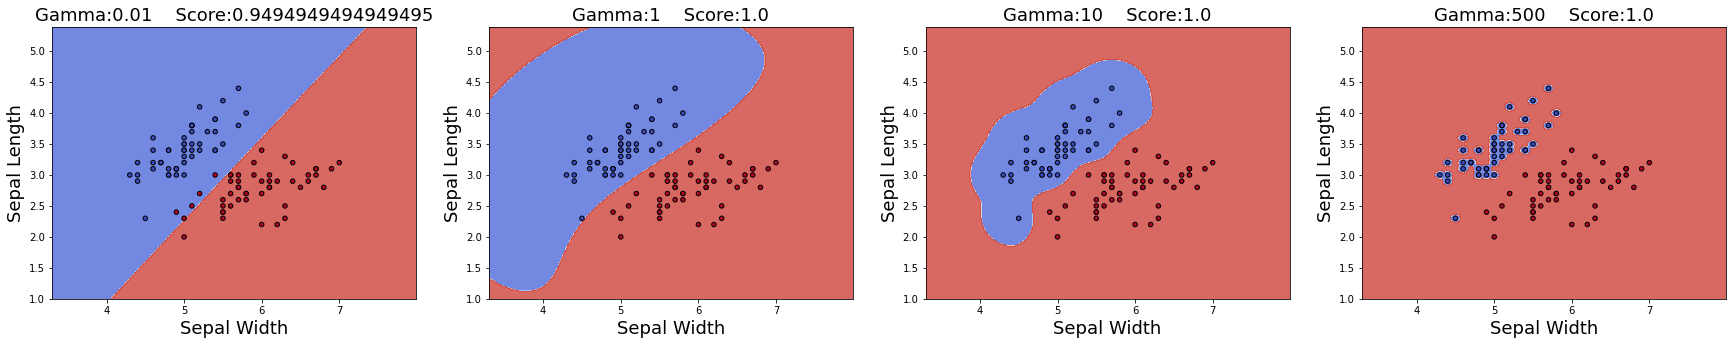

In [66]:
fig, ax = plt.subplots(1,4,figsize=(30,5))
for i,g in enumerate([0.01,1,10,500]):
    visualize_kernels(X,Y,ax[i],kernel = 'rbf', gamma = g,title = ("Gamma:" + str(g)))
plt.show()